## Sinusoid mapping study

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import hilbert, chirp
from math import*
import syncmetrics as syncm #from local folder
%matplotlib inline

In [2]:
# get_phase function
def get_phase(f,d):
    """get angular phase
    based on current value (f) and derivative (d)
    The sign of the derivative is used as the criterion to choose the arcsin solution
    """
    g = np.zeros(len(f))
    for i in range(len(f)):
        dn = int(d[i]<0)
        g[i] = (dn*np.pi - (2*dn-1)*asin(f[i]))
    return g%(2*np.pi)

In [4]:
#Load signals
txtload = True
filepath = "../acquisitions/BVP_RESPchest_4_1_4"

raw_A, rawtime, srate = syncm.loadsignal(filepath, 1, txtload)
# Use 15 sec (@ 1000Hz)
nsec = 9
srate = 1000
bsec = 6.5
b = int(bsec * srate)
sig_A = raw_A[b:b+nsec*srate]
t = rawtime[b:b+nsec*srate]

txtload


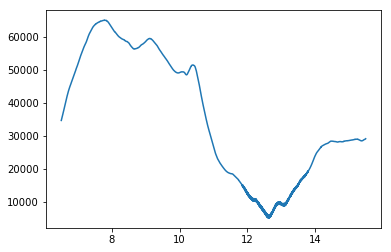

In [5]:
plt.plot(t,sig_A)

In [6]:
# Renormalise time
tn = (t - t[0]) / (t[-1]-t[0]) 

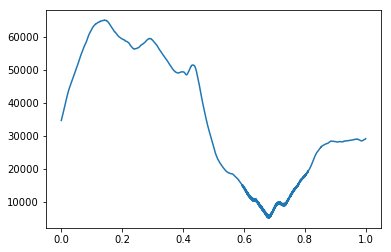

In [7]:
plt.plot(tn,sig_A)

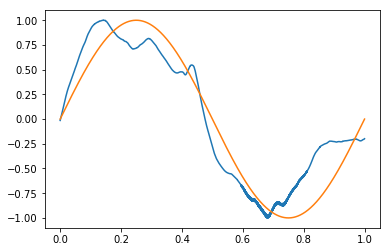

In [8]:
# Renormalise (maxmin) amplitudes
from sklearn.preprocessing import minmax_scale
sn = minmax_scale(sig_A)*2-1
plt.plot(tn,sn)
plt.plot(tn, np.sin(2*np.pi*tn))

In [9]:
phaseA = get_phase(sn[1:], np.diff(sn,0))

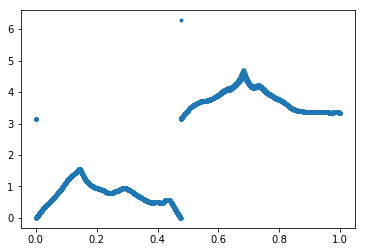

In [10]:
plt.plot(tn[1:],phaseA, '.')

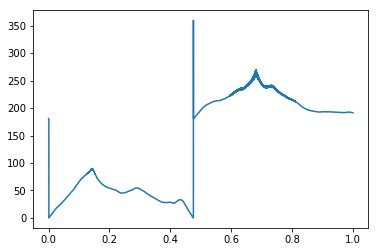

In [11]:
plt.plot(tn[1:],phaseA*180/np.pi)

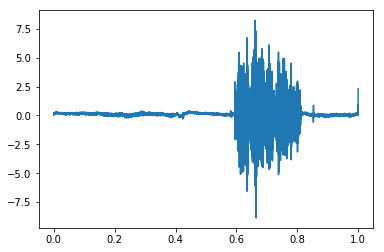

In [12]:
plt.plot(tn,syncm.comp_inst_phase(sn))

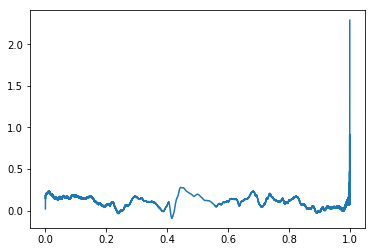

In [13]:
plt.plot(tn,syncm.comp_inst_phase(syncm.smoothing(sn)))

## Compute arc lengths
#### http://tutorial.math.lamar.edu/Classes/CalcII/ArcLength.aspx
$s = \int_{a}^{b}\sqrt{1+{\frac{dy}{dx}}^2}dx$

## Understanding Hilbert transform

5000 5.0


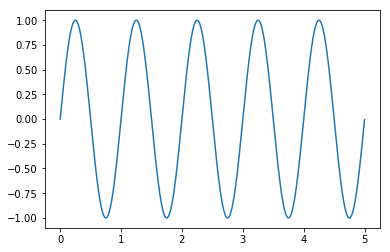

In [124]:
# signal=(np.sin(2*np.pi*tn))
#ph_offset = np.pi/2
ph_offset = 0.2
fs = 1000
endp = 100
k = int(0.05 * fs*endp)
a = np.linspace(0,endp,fs*endp)
signal=(np.sin(2*np.pi*a[:k]))
signal2=(np.sin(2*np.pi*a[:k]+ph_offset))
plt.plot(a[:k],signal)
print(k, k/fs)

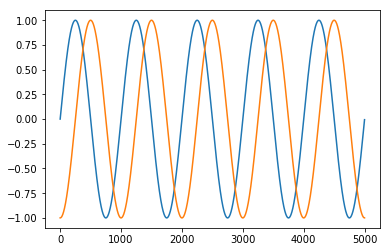

In [115]:
analytic_signal = hilbert(signal)
analytic_signal2 = hilbert(signal2)
amplitude_envelope = np.abs(analytic_signal)
amplitude_envelope2 = np.abs(analytic_signal2)
instantaneous_phase = (np.angle(analytic_signal))
instantaneous_phase2 = (np.angle(analytic_signal2))
plt.plot(analytic_signal.real)
plt.plot(analytic_signal.imag)

2.22044604925e-20 -0.999423336343
-1.57079632679
-0.314081974735


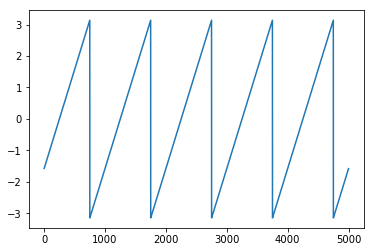

In [185]:
plt.plot(instantaneous_phase)
print(analytic_signal.real[0], analytic_signal.imag[0])
print(instantaneous_phase[0])
print(instantaneous_phase[1200])

In [117]:
np.where(np.abs(instantaneous_phase)<0.05)[0]

array([ 243,  244,  245,  246,  247,  248,  249,  250,  251,  252,  253,
        254,  255,  256,  257, 1243, 1244, 1245, 1246, 1247, 1248, 1249,
       1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 2243, 2244, 2245,
       2246, 2247, 2248, 2249, 2250, 2251, 2252, 2253, 2254, 2255, 2256,
       2257, 3243, 3244, 3245, 3246, 3247, 3248, 3249, 3250, 3251, 3252,
       3253, 3254, 3255, 3256, 3257, 4242, 4243, 4244, 4245, 4246, 4247,
       4248, 4249, 4250, 4251, 4252, 4253, 4254, 4255, 4256, 4257], dtype=int64)

In [118]:
instantaneous_phase[15]

-1.4765301328113585

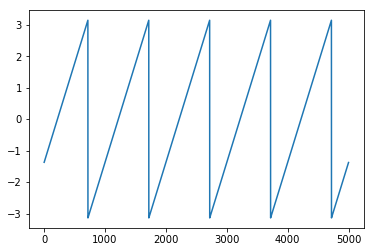

In [119]:
plt.plot(instantaneous_phase2)

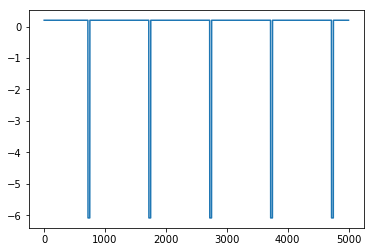

In [120]:
plt.plot((instantaneous_phase2-instantaneous_phase))

## See Fourier transform

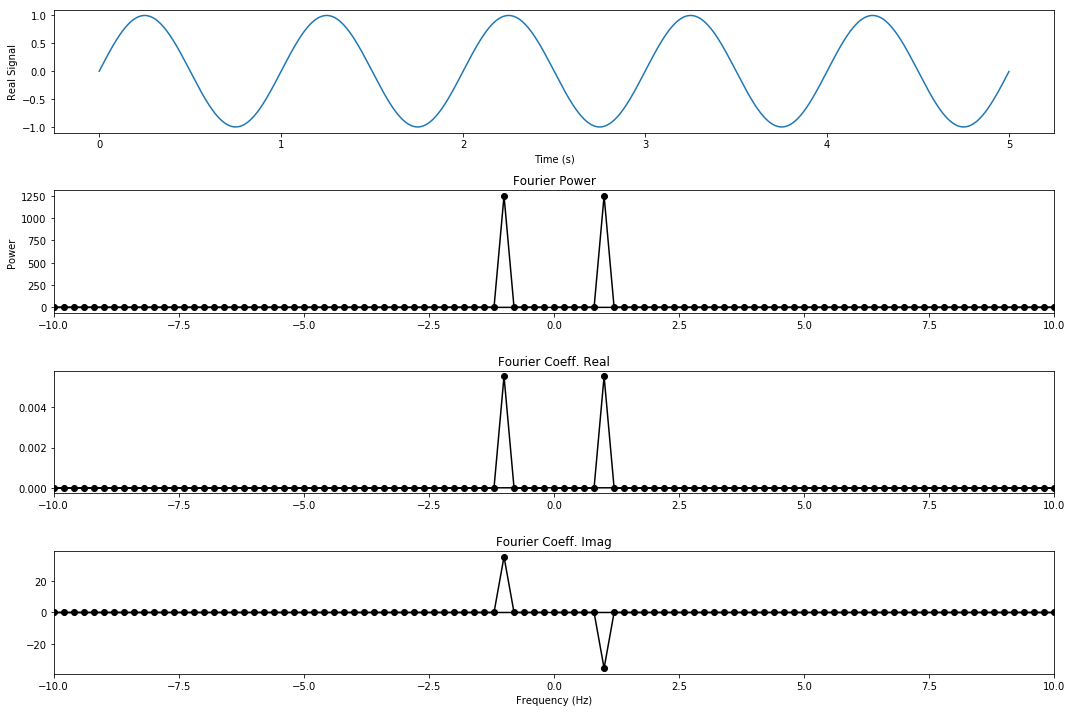

In [151]:
F = np.fft.fft(signal, norm='ortho')
f_axis = np.fft.fftfreq(len(signal),1/fs)

plt.figure(figsize=(15,10))
# time domain plot
plt.subplot(4,1,1)
plt.plot(a[:k],signal)
plt.xlabel('Time (s)')
plt.ylabel('Real Signal')


# frequency domain plots
plt.subplot(4,1,2)
plt.plot(f_axis, np.abs(F)**2,'ko-')
plt.ylabel('Power')
plt.title('Fourier Power')
plt.xlim([-10,10])

plt.subplot(4,1,3)
plt.plot(f_axis, F.real, 'ko-')
plt.title('Fourier Coeff. Real')
plt.xlim([-10,10])

plt.subplot(4,1,4)
plt.plot(f_axis, F.imag, 'ko-', label='Fourier Imag')
plt.title('Fourier Coeff. Imag')
plt.xlim([-10,10])
plt.xlabel('Frequency (Hz)')
plt.tight_layout()


In [152]:
F.real-np.amax(F.real)

array([-0.00555358, -0.00555357, -0.00555355, ..., -0.00555351,
       -0.00555355, -0.00555357])

In [153]:
np.where(np.abs(F.real-np.amax(F.real))<0.0001)[0]

array([   5, 4995], dtype=int64)

In [154]:
np.where(F.real==np.amax(F.real))[0]

array([4995], dtype=int64)

In [155]:
print(f_axis[np.where(F.real==np.amax(F.real))[0]])

[-1.]


In [156]:
print(f_axis[5], F.real[5])

1.0 0.00555146546791


In [157]:
print(f_axis)

[ 0.   0.2  0.4 ..., -0.6 -0.4 -0.2]


In [158]:
print(F.real)

[ -2.11039083e-06  -2.10576288e-06  -2.08923454e-06 ...,  -2.04791412e-06
  -2.08923454e-06  -2.10576288e-06]


## Quiver plot

0.951079813157 -0.308943295863
0.999998771054
-0.314081974735
-0.314081974735
-17.9955715735


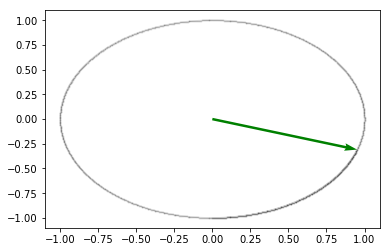

In [181]:
point = 1200
plt.plot(analytic_signal.real[:point],analytic_signal.imag[:point], 'k.-', alpha=0.1, ms=2)
plt.quiver(0,0,analytic_signal[point].real,analytic_signal[point].imag, angles='xy', scale_units='xy', scale=1, color='g')
print(analytic_signal[point].real, analytic_signal[point].imag)
print(analytic_signal[point].real**2 + analytic_signal[point].imag**2)
print(np.arctan2(analytic_signal[point].imag,analytic_signal[point].real))
print(instantaneous_phase[point])
print(instantaneous_phase[point]*180/np.pi)

0.99349949072 -0.113832569732
0.999999091992
-0.114079904028
-0.114079904028
-6.53629702809


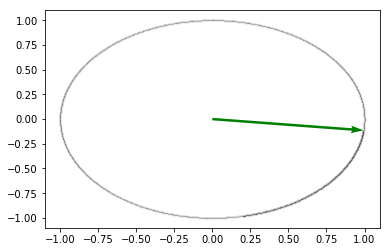

In [182]:
point = 1200
plt.plot(analytic_signal2.real[:point],analytic_signal2.imag[:point], 'k.-', alpha=0.1, ms=2)
plt.quiver(0,0,analytic_signal2[point].real,analytic_signal2[point].imag, angles='xy', scale_units='xy', scale=1, color='g')
print(analytic_signal2[point].real, analytic_signal2[point].imag)
print(analytic_signal2[point].real**2 + analytic_signal2[point].imag**2)
print(np.arctan2(analytic_signal2[point].imag,analytic_signal2[point].real))
print(instantaneous_phase2[point])
print(instantaneous_phase2[point]*180/np.pi)

In [183]:
ph_offset*180/np.pi

11.459155902616464

In [194]:
#novainstrumentation smooth
def smooth(input_signal, window_len=10, window='hanning'):
    """
    @brief: Smooth the data using a window with requested size.
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal
    (with the window size) in both ends so that transient parts are minimized
    in the beginning and end part of the output signal.
    @param: input_signal: array-like
                the input signal
            window_len: int
                the dimension of the smoothing window. the default is 10.
            window: string.
                the type of window from 'flat', 'hanning', 'hamming',
                'bartlett', 'blackman'. flat window will produce a moving
                average smoothing. the default is 'hanning'.
    @return: signal_filt: array-like
                the smoothed signal.
    @example:
                time = linspace(-2,2,0.1)
                input_signal = sin(t)+randn(len(t))*0.1
                signal_filt = smooth(x)
    @see also:  np.hanning, np.hamming, np.bartlett, np.blackman,
                np.convolve, scipy.signal.lfilter
    @todo: the window parameter could be the window itself if an array instead
    of a string
    @bug: if window_len is equal to the size of the signal the returning
    signal is smaller.
    """

    if input_signal.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")

    if input_signal.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")

    if window_len < 3:
        return input_signal

    if window not in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("""Window is on of 'flat', 'hanning', 'hamming',
'bartlett', 'blackman'""")

    sig = np.r_[2 * input_signal[0] - input_signal[window_len:0:-1],
                input_signal,
                2 * input_signal[-1] - input_signal[-2:-window_len-2:-1]]

    if window == 'flat':  # moving average
        win = np.ones(window_len, 'd')
    else:
        win = eval('np.' + window + '(window_len)')

    sig_conv = np.convolve(win / win.sum(), sig, mode='same')

    return sig_conv[window_len: -window_len]

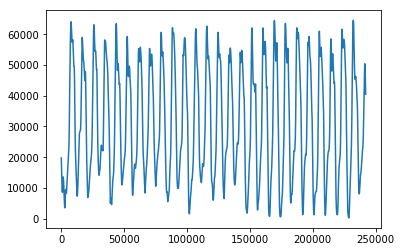

In [204]:
V = smooth(raw_A.flatten(),1000)
plt.plot(V)

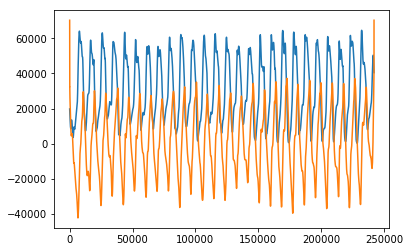

In [205]:
raw_A
analytic_acq = hilbert(V)
plt.plot(analytic_acq.real)
plt.plot(analytic_acq.imag)

In [206]:
instantaneous_phase_acq = (np.angle(analytic_acq))

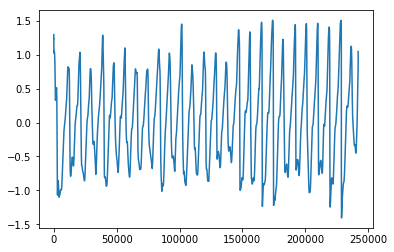

In [207]:
plt.plot(instantaneous_phase_acq)

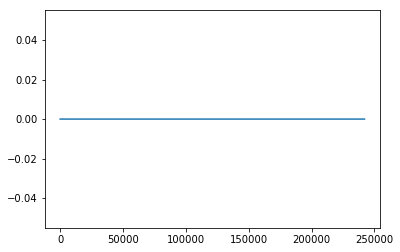

In [209]:
# Not working without smoothing
plt.plot(np.angle(hilbert(raw_A)))

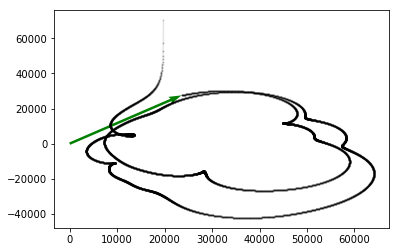

In [223]:
point = 20000
plt.plot(analytic_acq.real[:point],analytic_acq.imag[:point], 'k.-', alpha=0.1, ms=2)
plt.quiver(0,0,analytic_acq[point].real,analytic_acq[point].imag, angles='xy', scale_units='xy', scale=1, color='g')

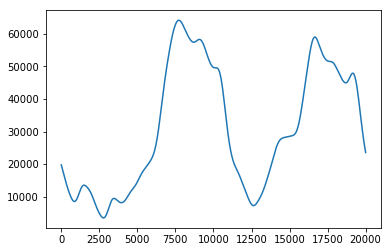

In [224]:
plt.plot(analytic_acq.real[:point])

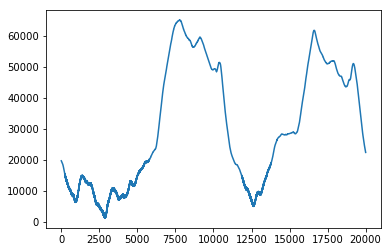

In [225]:
plt.plot(raw_A[:point])